In [29]:
import numpy as np
import grid_world_class as gw
import UCRL2_L as ucrl
import UCRL_SMDP as ucrlS
import experiment_utils as utils
import importlib
importlib.reload(gw)
importlib.reload(ucrl)
importlib.reload(ucrlS)
importlib.reload(utils)
import matplotlib.pyplot as plt

In [30]:
env_smdp = gw.grid_world(nS=100, T_max=8)
env_ucrl = gw.grid_world(nS=100, T_max=1)
ucrl_naive = ucrl.UCRL2(nS=100, nA = 4, delta = 0.05)
smdp_ucrl = ucrlS.UCRL_SMDP(nS = 100, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=1/2, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 8)
Bus_ucrl = ucrlS.BUS(nS = 100, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=1/2, sigma_tau=None ,r_max=1,tau_min=1, tau_max=None, T_max_grid = np.array([2,4,6,8,10]))
_,_,_,gstar = utils.VI(env_ucrl)

In [31]:
reward_ucrl,tau_ucrl = utils.run_experiment(env_ucrl, ucrl_naive, T = 10**7)
reward_sucrl,tau_sucrl = utils.run_experiment(env_smdp, smdp_ucrl, T = 10**7)

In [32]:
reward_bus,tau_bus = utils.run_experiment(env_smdp, Bus_ucrl, T = 10**7)

In [33]:
print(np.mean(reward_sucrl),
np.mean(reward_ucrl),
np.mean(reward_bus)
)

0.0178534 0.0003147 0.0221445


In [34]:
regret_ucrl = utils.calc_regret(reward=reward_ucrl, tau = tau_ucrl, optimal_gain=gstar)
regret_sucrl = utils.calc_regret(reward=reward_sucrl, tau = tau_sucrl, optimal_gain=gstar)

In [35]:
regrets_bus = utils.calc_regret(reward=reward_bus, tau = tau_bus, optimal_gain=gstar)

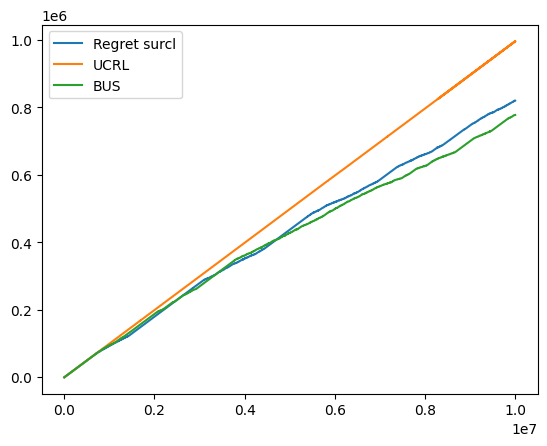

In [36]:
plt.plot(regret_sucrl, label = "Regret surcl")
plt.plot(regret_ucrl, label = "UCRL")
plt.plot(regrets_bus, label = "BUS")
plt.legend()

In [39]:
Bus_ucrl.current_sample_prop
Bus_ucrl.n_episodes

1015